# Sample Solution


## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

### 2. Load the dataset and display a sample of five rows of the data frame.

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/heart_data.csv')

In [3]:
df = pd.read_csv('heart_2020.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [4]:
## Lets check the shape
df.shape

(319795, 18)

In [5]:
## Lets check basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

- The output shows that we have around 319795 entries with 18 columns. 
- We have 14 object type data and 4 float type data

### 4. Check the statistical summary of the dataset and write your inferences.

In [6]:
## Lets check the statistical summary of the bumerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [7]:
## Lets check the statistical summary of the categorical data
df.describe(include='O')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


- The minimum value of the BMI is around 12 and maximum is 94.85
- The mental health indicates that for how many days during the past 30 days was your mental health not good, so that minimum value 0 means the person's mental health was good throughout the month whereas on an average it is 7 days that mental health was not good. 
- HeartDisease, Smoking, Alcohol Drinking, Stroke, DiffWalking, Sex, PhysicalActivity, Asthma, KidneyDisease, and SkinCancer columns contain the binary categories 'Yes' or 'NO'.
- There are 6 different race category.

### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [8]:
# Checking missing values in each colunms
df.isnull().sum()/len(df)*100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

- There are no missing values in the dataset.

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [9]:
len(df[df.duplicated()])

18078

- There are around 18K duplicate record, lets drop them.

In [10]:
## dropping duplicates
df.drop_duplicates(inplace=True)

In [11]:
## checking the shape after dropping duplicates
df.shape

(301717, 18)

### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

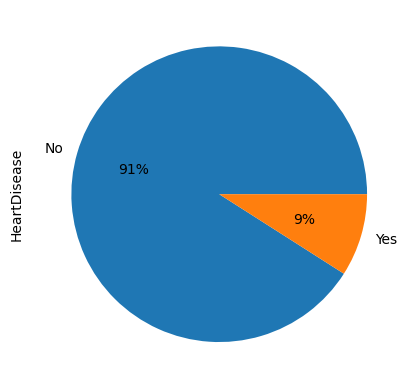

In [12]:
## Let's check the count of target variable
df['HeartDisease'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

- We can observe that the target class distribution is highly imbalanced.

### 8. Visualize the distribution of the target column 'heart disease' with respect to various categorical features and write your observations.

In [13]:
### Categorical features in the dataset
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

##### Let's look at the distribution of the number of people with heart disease from various factors

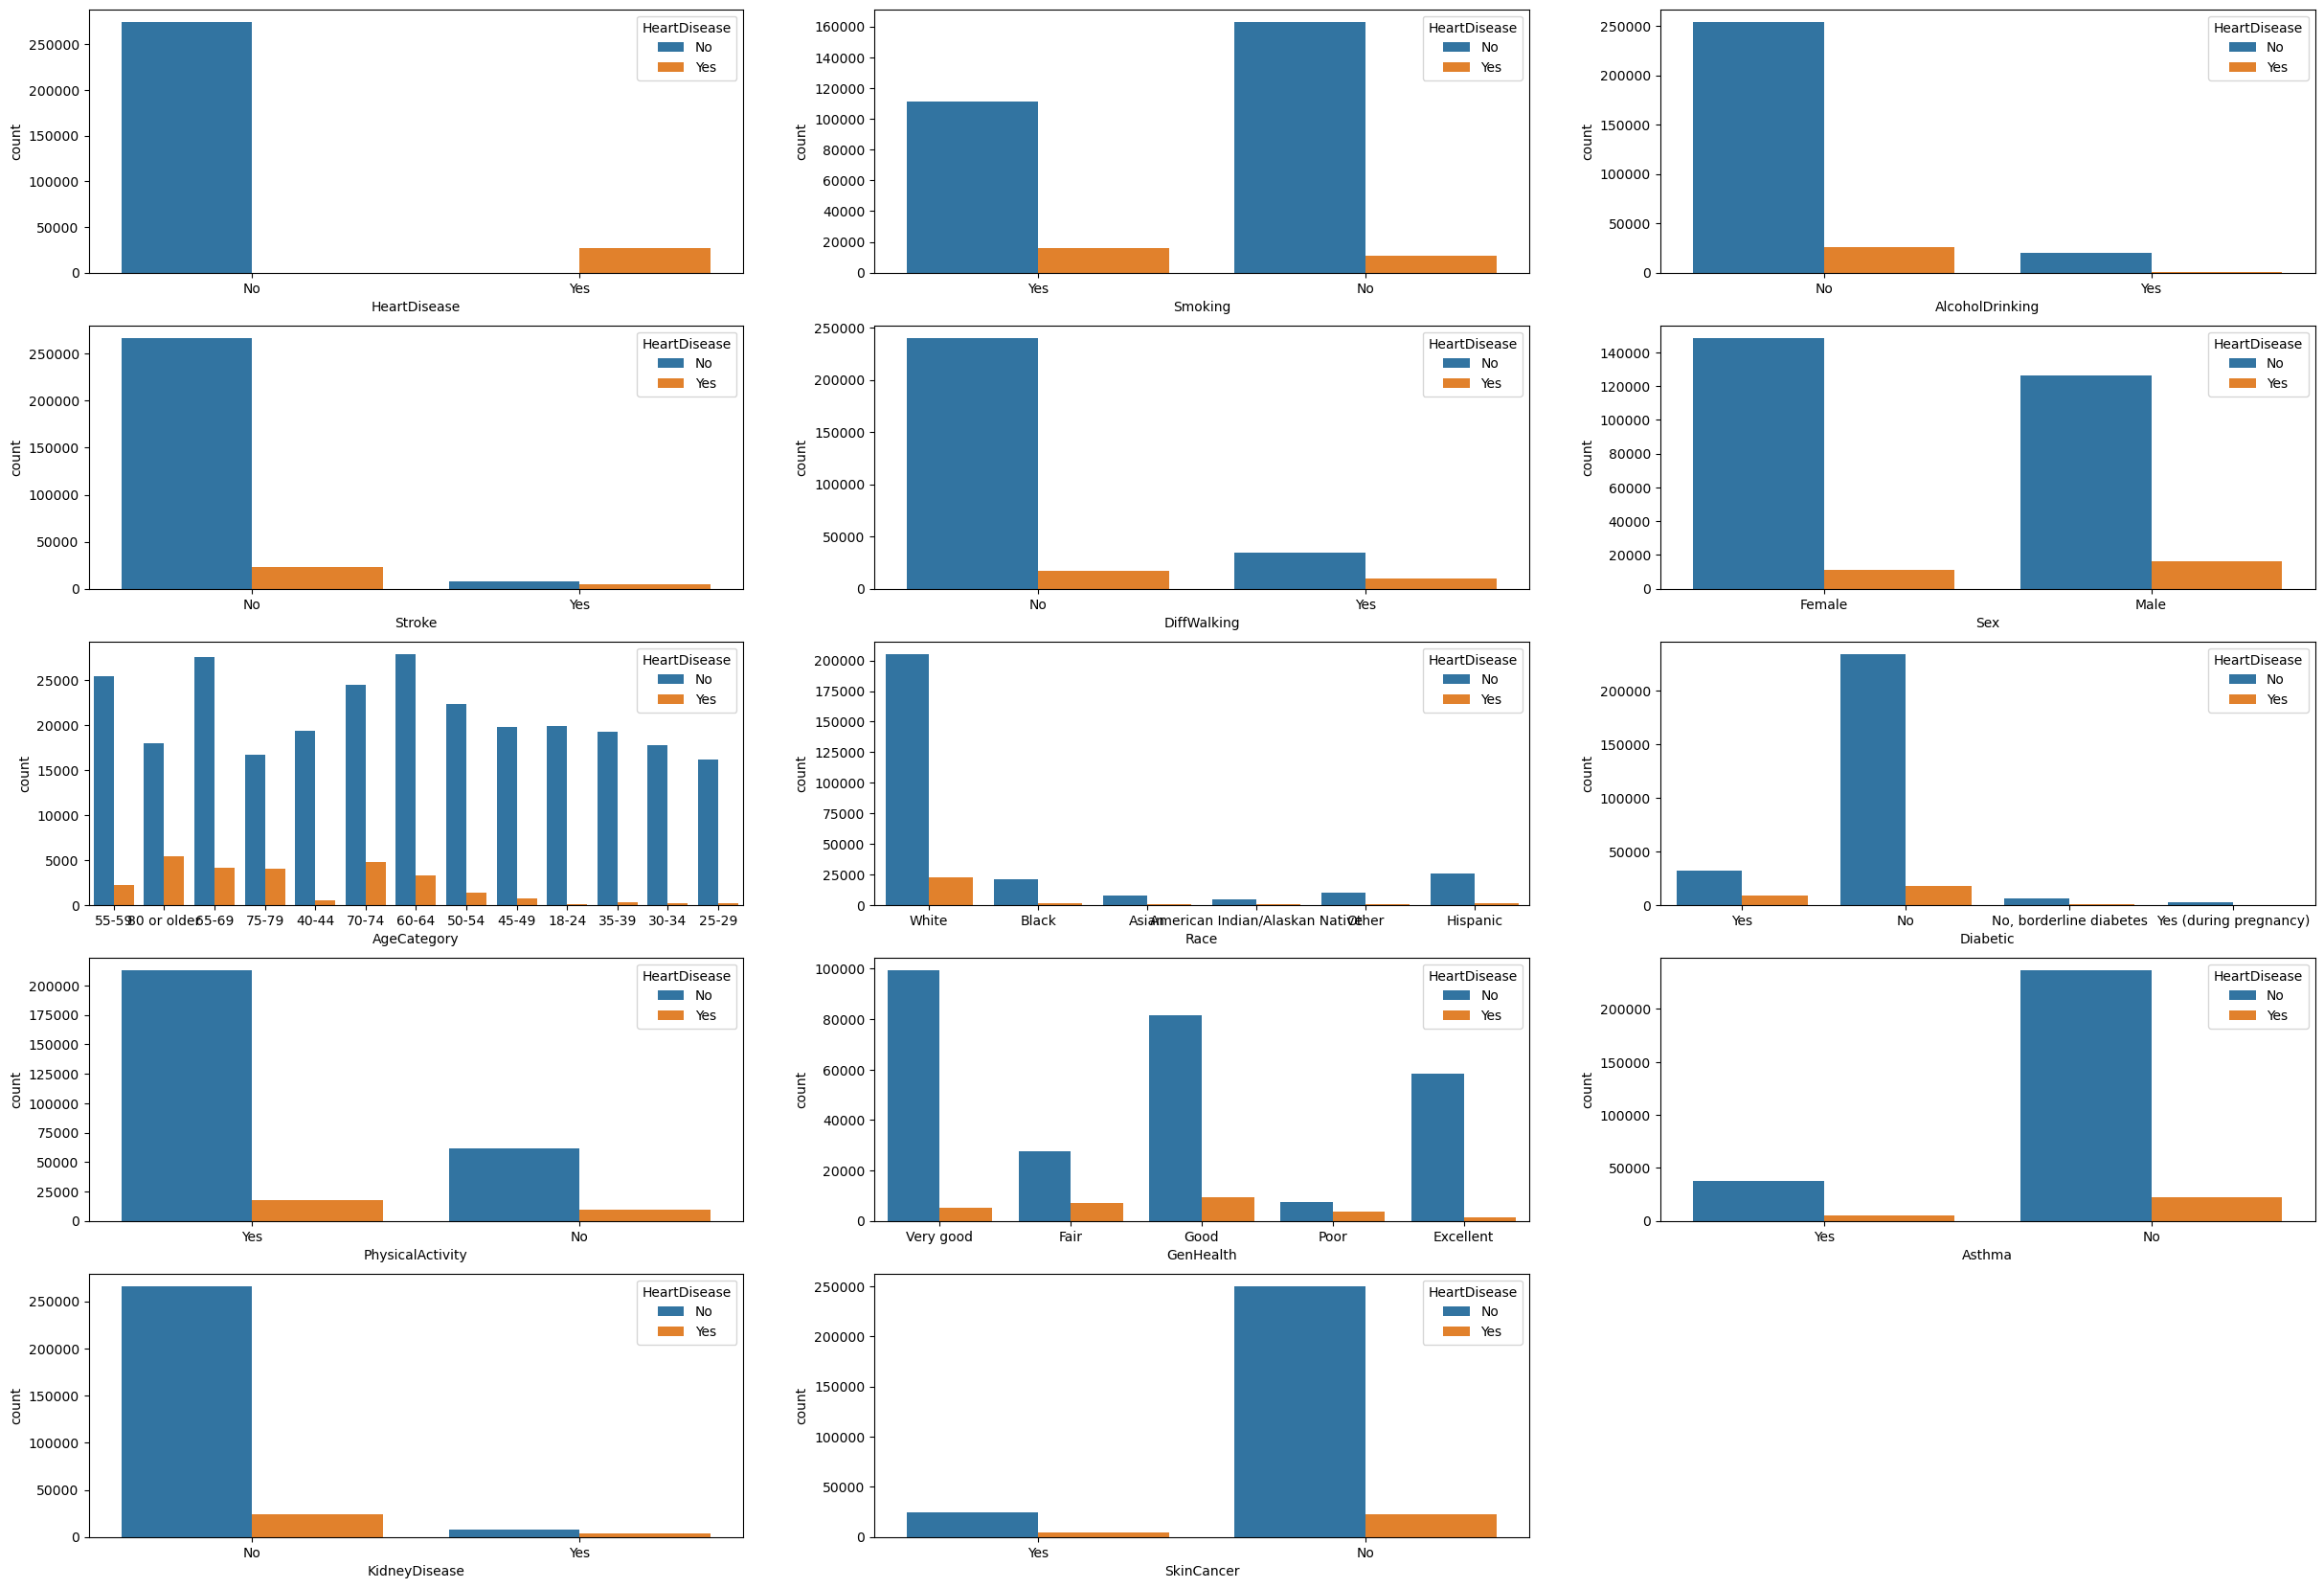

In [14]:
i = 1
plt.figure(figsize = (30,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature,hue = 'HeartDisease' , data = df)
    i +=1

- From the plot we can observe that:
- People who smoke have higher chances of heart diesease than non smokers.
- Male are more prone to suffer from heart diseases as compared to females.
- People with age limit in between 55-75 has higher chances of getting heart diseases.
- If person has difficulty in walking or climbing stairs there is a high probability that he or she is suffering from some heart disease.
- There are higher chances of a person having heart disease if he does not have any kidney disease.

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [15]:
## let check unique categories in column 'Diabetic'
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [16]:
df['Diabetic'] = df['Diabetic'].replace({'Yes (during pregnancy)':'Yes','No, borderline diabetes':'No'})

In [17]:
## recheck
df['Diabetic'].value_counts()

No     258572
Yes     43145
Name: Diabetic, dtype: int64

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [18]:
## Replacing "No" as 0 and "Yes" as 1
df['HeartDisease'] = df['HeartDisease'].replace({'Yes':1,'No':0})

In [19]:
## lets check
df['HeartDisease'].value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [20]:
## Label Encoding categorical variables using "AgeCategory", "Race", and "GenHealth" label encoder

## select object datatype variables
object_type_variables = [i for i in df[['AgeCategory','Race','GenHealth']] if df.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(df)

In [21]:
## Dummy encoding the rest of the columns, since they have binary entries. 'Yes' or 'No'
df = pd.get_dummies(df,drop_first=True)

In [22]:
## let check few samples after encoding.
df.head(2)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3.0,30.0,7,5,4,5.0,1,0,0,0,0,1,1,1,0,1
1,0,20.34,0.0,0.0,12,5,4,7.0,0,0,1,0,0,0,1,0,0,0


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [23]:
## Lets store the target column in the Y variable and the rest of the columns in the X variable.
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [24]:
## train_test_split() is used to divide dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(211201, 17) (90516, 17)
(211201,) (90516,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [25]:
## Standardizing only numerical columns. (not standardizing the dummy encoded data)
ss = StandardScaler()

X_train.iloc[:,:7] = ss.fit_transform(X_train.iloc[:,:7])
X_test.iloc[:,:7] = ss.transform(X_test.iloc[:,:7])

In [26]:
## Lets check few scaled features
X_train.head(2)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
276433,0.444303,0.174046,0.476922,-0.977973,0.513879,-0.146883,0.622355,1,0,0,0,0,0,1,0,0,0
191325,0.266459,-0.439859,0.107760,-1.256971,0.513879,1.177335,-0.058491,1,1,0,0,1,0,1,0,0,0


In [27]:
X_test.head(2)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
151219,0.232436,-0.439859,-0.50751,-1.814969,-1.913094,1.177335,1.984047,0,0,0,0,0,0,1,0,0,0
196536,-1.181042,-0.194297,-0.50751,1.533015,-1.104103,-0.146883,-0.058491,0,0,0,0,1,0,1,0,0,0


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [28]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs

    model.fit(X_train, y_train)   # fits the model with the train data

    pred = model.predict(X_test)  # makes predictions on the test set

    accuracy = accuracy_score(y_test, pred)
                   
    return accuracy  # return all the metrics

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [29]:
## Intializing the models

lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf', rf),('knn', knn), ('gb', gb), ('adb', adb)]
sc = StackingClassifier(estimators=estimators, final_estimator=rf)

In [30]:
result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr, nb, knn, dt, rf, adb, gb, sc], 
                             ['Logistic Regression','Naive Bayes','KNN','Decision tree', 
                              'Random Forest', 'Ada Boost', 'Gradient Boost', 'Stacking']):
    
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)

In [31]:
result

,Accuracy
Logistic Regression,0.910160
Naive Bayes,0.841476
KNN,0.900581
Decision tree,0.854965
Random Forest,0.899090
Ada Boost,0.910811
Gradient Boost,0.911342
Stacking,0.905067


### Conclusion

- From EDA:-
  - People who smoke have higher chances of heart diesease than no smokers
  - Male are more prone to suffer from heart diseases as compared to females
  - People with age limit in between 55-75 has higher chances of getting heart diseases
  - If person has difficulty in walking or climbing stairs there is a high probability that he or she is suffering from some heart disease
  - There are higher chances of a person having heart disease if he does not have any kidney disease.
- From Model:-
  - We see that the best performing models are Gradient Boost, Adaboost,Logistic Regression and KNN with around 91% accuracy.
  - Please note that the target class is highly imbalanced So, accuracy does not holds good for imbalanced data. Accuracy becomes poor measure of evaluation for our classification model in this context.
  - We can further go with evaluating the models based on the different performance metrics such as presicion, recall and F1score and choose the model accordingly.
  - Further we can apply sampling techniques and try to balance the data and build models based on that data will increase our model performance, Kindly refer to this link to know how deal with imbalanced data https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
  - Also, we can tune the hyperparameters and find the best set of hyperparameters and building the models based on those will increase the classification performance of the model.

----
## Happy Learning:)
----